In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import mglearn  # utility 라이브러리 - 시각화나 데이터처리

In [3]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [4]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트 :\n",counts)

특성 카운트 :
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


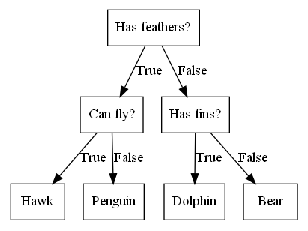

In [5]:
mglearn.plots.plot_animal_tree()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [7]:
cancer.data.shape

(569, 30)

In [8]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [9]:
# 과적합을 막는 전략 - 트리의 깊이 제한(max_depth)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [10]:
from sklearn.tree import export_graphviz
# impurity(불순도) : 여러가지 클래스가 섞여 있는 정도
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

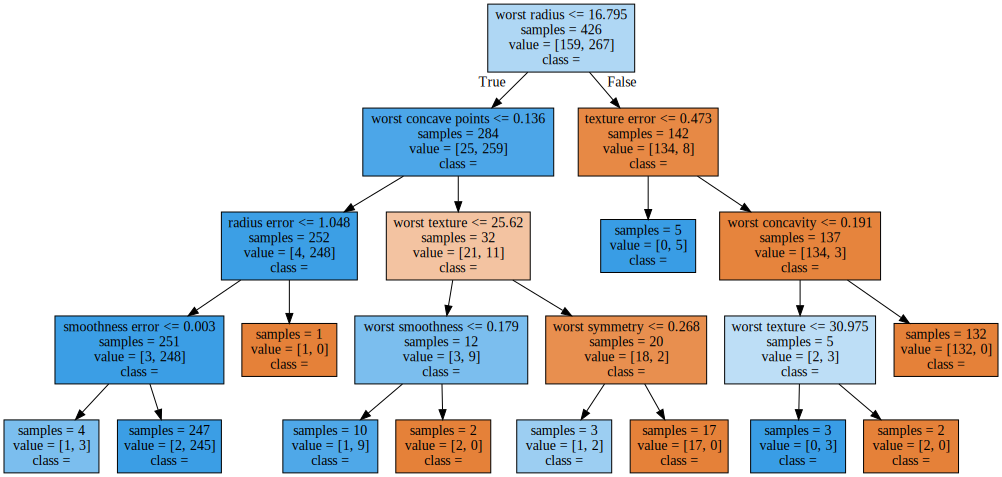

In [11]:
import graphviz

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]      # (꽃받침의 길이와 너비)생략, 꽃잎의 길이와 너비
y = iris.target    # 품종

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

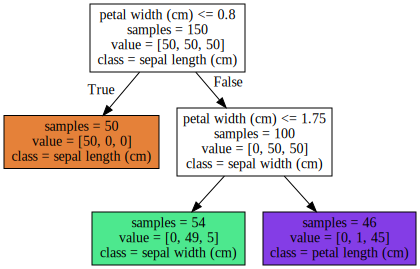

In [14]:
from graphviz import Source

export_graphviz(tree_clf,                             # 모델
                out_file="iris_tree.dot",             # 저장경로 파일설정
                feature_names=iris.feature_names[2:], # 변수명
                class_names=iris.feature_names,       # 종속변수
                impurity=False, filled=True) 

Source.from_file("iris_tree.dot")

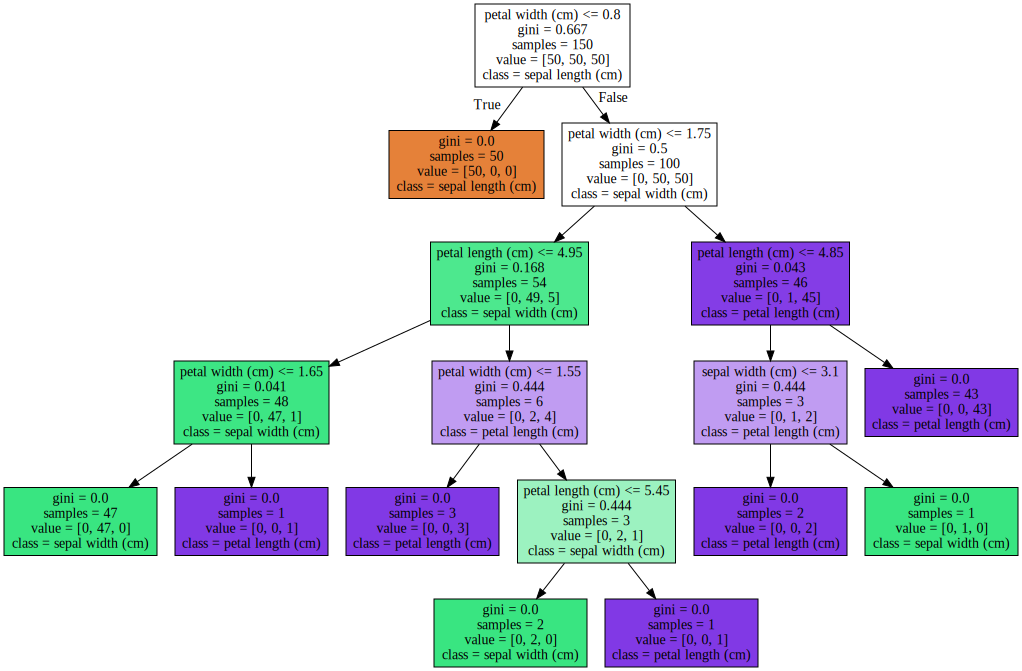

In [20]:
iris = load_iris()
X = iris.data      # 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

export_graphviz(tree_clf,                             # 모델
                out_file="iris_tree2.dot",            # 저장경로 파일설정
                feature_names=iris.feature_names,     # 변수명
                class_names=iris.feature_names,       # 종속변수
                impurity=True,                        # 지니불순도(GINI IMPURITY)
                filled=True) 

Source.from_file("iris_tree2.dot")

In [21]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


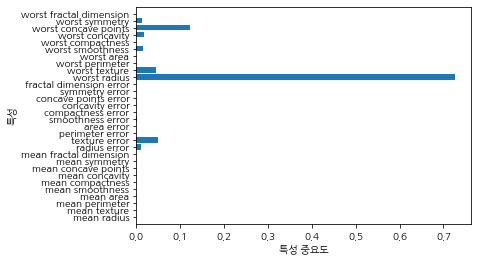

In [24]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


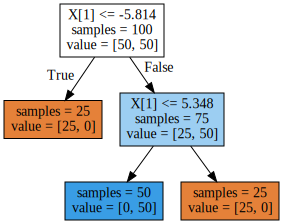

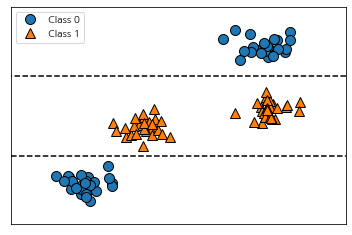

In [29]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, '가격 ($/Mbyte_')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


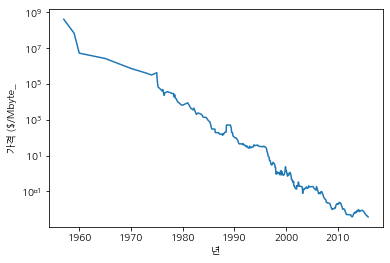

In [34]:
import matplotlib as mpl
mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)

import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte_")

In [31]:
ram_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
Unnamed: 0    333 non-null int64
date          333 non-null float64
price         333 non-null float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


In [33]:
ram_prices[:10]

,Unnamed: 0,date,price
0,0,1957.00,411041792.0
1,1,1959.00,67947725.0
2,2,1960.00,5242880.0
3,3,1965.00,2642412.0
4,4,1970.00,734003.0
5,5,1973.00,399360.0
6,6,1974.00,314573.0
7,7,1975.00,421888.0
8,8,1975.08,180224.0
9,9,1975.25,67584.0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


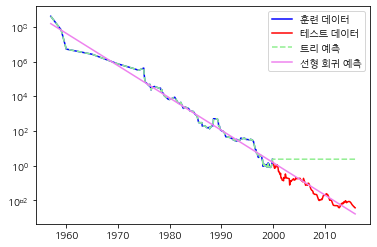

In [54]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터", c='b')
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터", c='r')
plt.semilogy(ram_prices.date, price_tree, label="트리 예측", c='lightgreen', linestyle='--')
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측", c='violet')
plt.legend()

### Random Forest(랜덤 포레스트)
- 앙상블 기법 중 배깅(Bagging)과 유사한 분류 알고리즘
- 같은 알고리즘으로 여러 개의 분류기를 만드는 알고리즘
- 배깅의 대표적인 알고리즘 (배깅 - 단일 알고리즘을 여러개 만들어서 확인)
- 결정트리를 기반으로 하는 알고리즘
- 여러 개의 결정트리를 이용하여 분류기를 만들어 학습
- 최종적으로 voting(보팅)을 통해 예측을 결정

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 결정트리(n_estimators)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

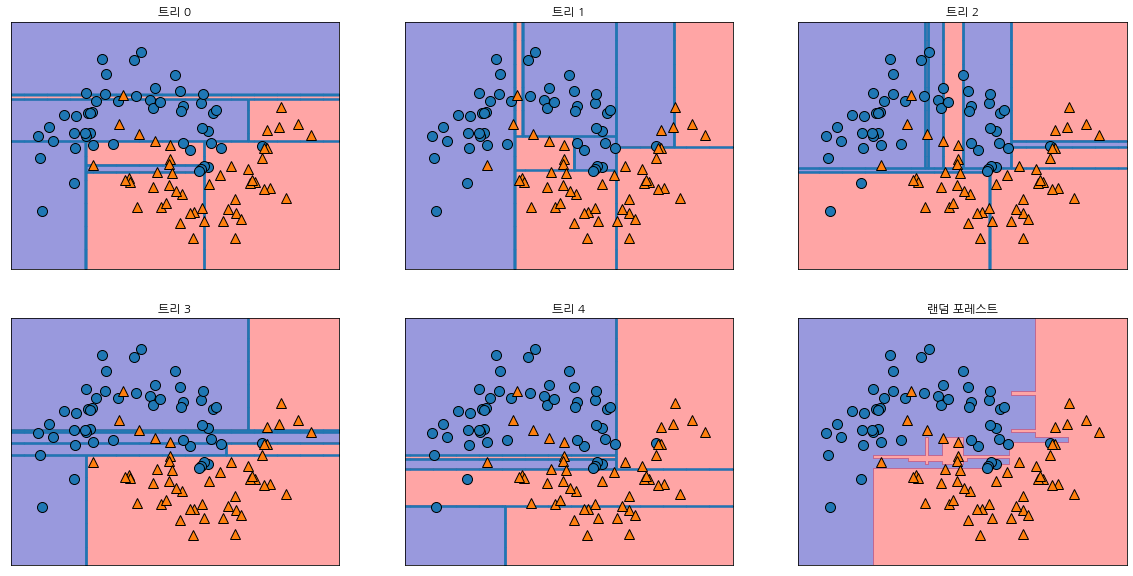

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)  # max_feature 최대 사용하는 특성 개수
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


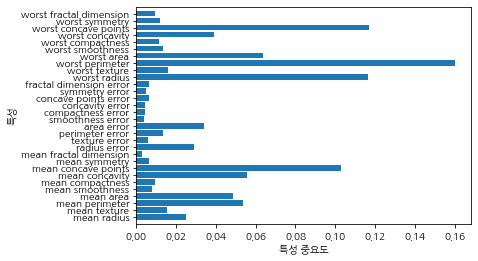

In [58]:
plot_feature_importances_cancer(forest)

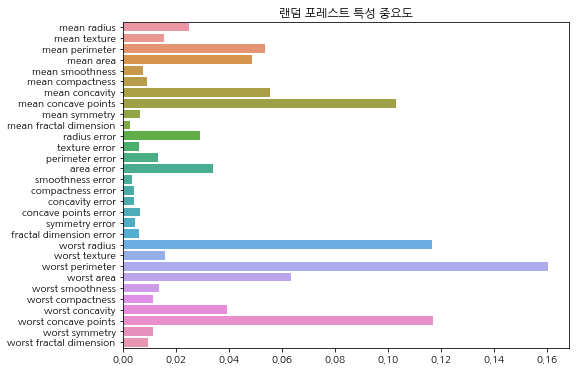

In [59]:
import seaborn as sns
importances_values = forest.feature_importances_
# importances = pd.Series(importances_values, index=cancer.feature_names)
index = cancer.feature_names

plt.figure(figsize=(8, 6))
plt.title("랜덤 포레스트 특성 중요도")
sns.barplot(x=importances_values, y=index)
plt.show()